In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf 
from scipy.interpolate import interp1d
import seaborn.objects as so
#Importing sklearn functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
cancellations_hospital_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hospital.csv")
cancellations_hospital = pd.read_csv(cancellations_hospital_fp)

In [3]:
cancellations_hospital.isna().sum()

_id                               0
Month                             0
Hospital                          0
TotalOperations                   0
TotalOperationsQF              4502
TotalCancelled                    0
TotalCancelledQF               4502
CancelledByPatientReason          0
CancelledByPatientReasonQF     4502
ClinicalReason                    0
ClinicalReasonQF               4502
NonClinicalCapacityReason         0
NonClinicalCapacityReasonQF    4502
OtherReason                       0
OtherReasonQF                  4502
dtype: int64

In [4]:
# drop unncessary columns
cancellations_hospital.drop(columns=["_id","TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)
cancellations_hospital

,Month,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,201505,A111H,884,67,21,25,16,5
1,201506,A111H,945,84,39,30,12,3
2,201507,A111H,948,72,25,33,6,8
3,201508,A111H,882,74,42,18,12,2
4,201509,A111H,845,67,32,30,3,2
...,...,...,...,...,...,...,...,...
4497,202401,Z102H,164,27,16,3,8,0
4498,202401,T101H,822,69,26,27,2,14
4499,202401,T202H,336,22,4,11,1,6
4500,202401,T312H,392,40,16,9,2,13


In [5]:
# change data type for month
cancellations_hospital["Month"] = pd.to_datetime(cancellations_hospital.Month, format="%Y%m")
cancellations_hospital.rename({"Month":"Date"}, inplace=True)


In [6]:
cancellations_hospital

,Month,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,2015-05-01,A111H,884,67,21,25,16,5
1,2015-06-01,A111H,945,84,39,30,12,3
2,2015-07-01,A111H,948,72,25,33,6,8
3,2015-08-01,A111H,882,74,42,18,12,2
4,2015-09-01,A111H,845,67,32,30,3,2
...,...,...,...,...,...,...,...,...
4497,2024-01-01,Z102H,164,27,16,3,8,0
4498,2024-01-01,T101H,822,69,26,27,2,14
4499,2024-01-01,T202H,336,22,4,11,1,6
4500,2024-01-01,T312H,392,40,16,9,2,13


In [7]:
#pd.set_option('display.max_rows', None)
print(len(cancellations_hospital.Hospital.value_counts()))
# there are 49 hospitals here
# some of them 

49


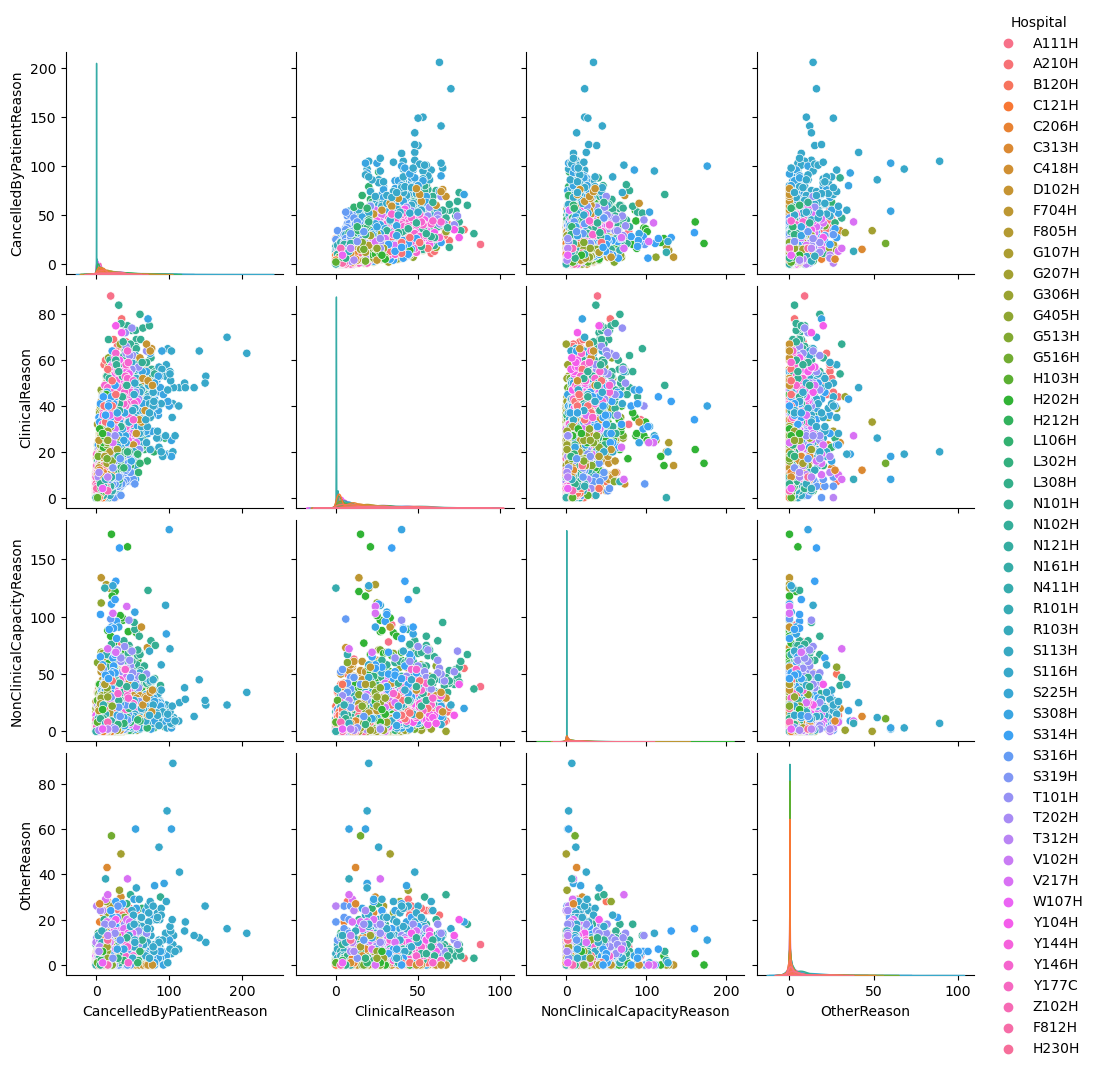

In [10]:
sns.pairplot(data=cancellations_hospital[["Hospital","CancelledByPatientReason","ClinicalReason","NonClinicalCapacityReason","OtherReason"]],hue="Hospital")